# Importing Libraries

In [126]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.2.1+cpu'

# Write a device agnostic Code

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1 
step = 0.02

X   = torch.arange(start , end , step).unsqueeze(dim = 1) 
y = weight * X + bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Split the data

In [9]:
train_split = int(0.8 * len(X))

X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

# Plot the data

In [82]:
def plot_prediction(X_train_label = X_train , y_train_label= y_train,
                    X_test_label = X_test , y_test_label = y_test , predictions = None):

                    plt.scatter(X_train_label , y_train_label , c = "b" , s = 4 , label = "TrainingData" )
                    plt.scatter(X_test_label , y_test_label , c = "g" , s = 4 , label = "TestData")
                    
                    if predictions is not None:
                        plt.scatter(X_test_label , predictions , c = "r" , s = 4 , label = "Predictions")
                    plt.legend()

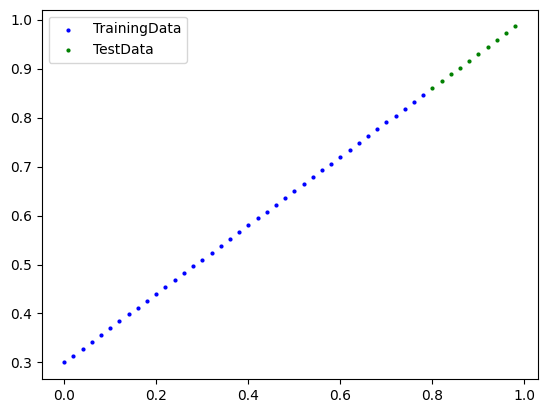

In [83]:
plot_prediction()

# Build Model 

In [21]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self):
        return self.linear_layer(x)

In [22]:
modelV2 = LinearRegressionModelV2()

In [23]:
modelV2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.9983]])),
             ('linear_layer.bias', tensor([0.1653]))])

In [170]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))

    def forward(self , X:torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

In [171]:
model = LinearRegressionModel()

In [172]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

# Check the device

In [173]:
next(model.parameters()).device

device(type='cpu')

In [174]:
model.to(device)
next(model.parameters()).device

device(type='cpu')

In [175]:
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

# Training

In [176]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.01)

In [177]:
torch.manual_seed(42)

epochs = 600

# Put data on the target device - Device agnostic code for the data

epoch_count = []
train_losses = []
test_losses =[]

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred , y_train)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    #Testing
    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred , y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_losses.append(loss)
        test_losses.append(test_loss)
        print(f"Epoch: {epoch} | Train_loss: {loss} | Test_loss: {test_loss}")





    

Epoch: 0 | Train_loss: 0.47248879075050354 | Test_loss: 0.5755255818367004
Epoch: 10 | Train_loss: 0.29560011625289917 | Test_loss: 0.3531690239906311
Epoch: 20 | Train_loss: 0.18495838344097137 | Test_loss: 0.21562115848064423
Epoch: 30 | Train_loss: 0.11575271934270859 | Test_loss: 0.13078677654266357
Epoch: 40 | Train_loss: 0.072464719414711 | Test_loss: 0.07866328954696655
Epoch: 50 | Train_loss: 0.04538766294717789 | Test_loss: 0.046795621514320374
Epoch: 60 | Train_loss: 0.02845033071935177 | Test_loss: 0.02743770182132721
Epoch: 70 | Train_loss: 0.01785522699356079 | Test_loss: 0.01577904261648655
Epoch: 80 | Train_loss: 0.011227093636989594 | Test_loss: 0.008837966248393059
Epoch: 90 | Train_loss: 0.007080242037773132 | Test_loss: 0.00477070827037096
Epoch: 100 | Train_loss: 0.004485415760427713 | Test_loss: 0.002440699841827154
Epoch: 110 | Train_loss: 0.002861354500055313 | Test_loss: 0.0011500805849209428
Epoch: 120 | Train_loss: 0.0018445199821144342 | Test_loss: 0.00047261

In [178]:
model.state_dict()

OrderedDict([('weights', tensor([0.6659])), ('bias', tensor([0.3139]))])

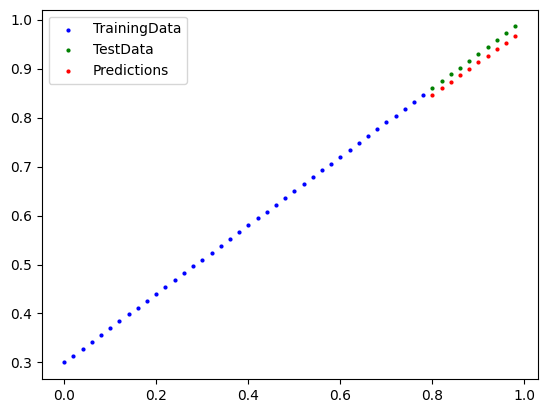

In [179]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)

plot_prediction(predictions = predictions)

# Save the model 

In [180]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)


MODEL_NAME = "Model1.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

torch.save(obj = model.state_dict() , f = MODEL_SAVE_PATH)

# Load Model

In [181]:
load_model = LinearRegressionModel()

In [182]:
load_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [183]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.6659])), ('bias', tensor([0.3139]))])

In [184]:
next(load_model.parameters()).device

device(type='cpu')

In [185]:
load_model.eval()
with torch.inference_mode():
    load_model_pred = load_model(X_test)

load_model_pred == predictions


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

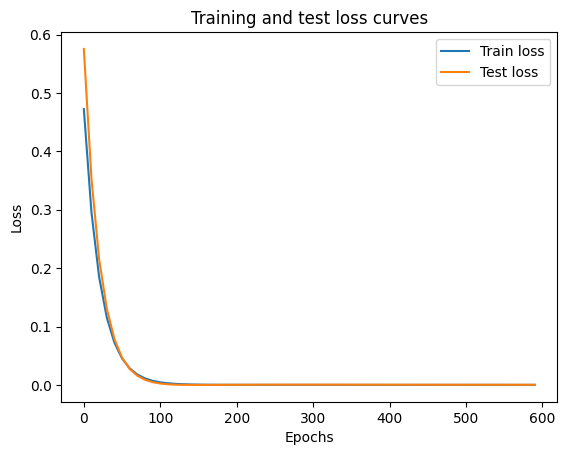

In [186]:
plt.plot(epoch_count , np.array(torch.tensor(train_losses).numpy()) , label = "Train loss")
plt.plot(epoch_count , test_losses , label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()